# Hyperparameters

### Scope
In this notebook, we examine the effect of MLP activation functions and other hyperparameters

### Purpose
To show why we selected the hyperparameters as we did

### Results
Given the report results from the training we chose to fix the following hyperparameters and configurations:
- ...

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from train import train_model
from models import LightGCNPlus
from config import DEVICE
from train import train_model
from postprocess import report_training_results
from itertools import product

In [2]:
from load import load_train_data
train_df = load_train_data()

In [3]:
from preprocess import preprocess

A_tilde, \
train_users, train_items, train_ratings, \
val_users, val_items, val_ratings \
= preprocess(train_df)

In [9]:
# Train loop hyperparameters
EPOCHS = 1000
STOP_THRESHOLD=1e-09

# Initial hyperparameters
INIT_EMBS_STD = 0.075
LR = 0.1
WEIGHT_DECAY = 0.00005
DROPOUT = 0.5
ACT_FN = nn.GELU()

# Fixed values for K, L, and PROJECTIONS
K = 28
L = 3
PROJECTIONS = (4,)

# Hyperparameter values to be searched
init_embs_stds = [0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.1]      # 10 values for INIT_EMBS_STD
lrs = [0.01, 0.03, 0.05, 0.07, 0.1, 0.13, 0.15, 0.17, 0.2, 0.25]                      # 10 values for LR
weight_decays = [0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.00004, 0.00005, 0.00006, 0.00007, 0.0001] # 10 values for WEIGHT_DECAY
dropouts = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]                        # 10 values for DROPOUT
activation_functions = [nn.GELU(), nn.ReLU(), nn.LeakyReLU(), nn.ELU(), nn.Sigmoid(), nn.Tanh(), nn.Softplus(), nn.Softsign(), nn.SELU(), nn.CELU()] # 10 values for ACT_FN

In [12]:
# Tuning LightGCNPlus
results = {
    "min_val_losses": [],
    "params": []
}


Testing INIT_EMBS_STD=0.05
Epoch 100 - Best Val: 0.9931 at 101 - mv-avg: - Train: 1.4273 - Val: 1.3045
Epoch 200 - Best Val: 0.9903 at 199 - mv-avg: - Train: 1.0161 - Val: 0.9924
Epoch 300 - Best Val: 0.9866 at 301 - mv-avg: - Train: 0.9955 - Val: 0.9882
Epoch 400 - Best Val: 0.9856 at 401 - mv-avg: - Train: 0.9860 - Val: 0.9864
Epoch 500 - Best Val: 0.9848 at 487 - mv-avg: - Train: 0.9797 - Val: 0.9857
Epoch 600 - Best Val: 0.9839 at 560 - mv-avg: - Train: 0.9757 - Val: 0.9849
Epoch 700 - Best Val: 0.9835 at 624 - mv-avg: - Train: 0.9729 - Val: 0.9845
Epoch 800 - Best Val: 0.9831 at 770 - mv-avg: - Train: 0.9710 - Val: 0.9842
Epoch 900 - Best Val: 0.9831 at 770 - mv-avg: - Train: 0.9698 - Val: 0.9841
Best val loss: 0.9831 at epoch 770


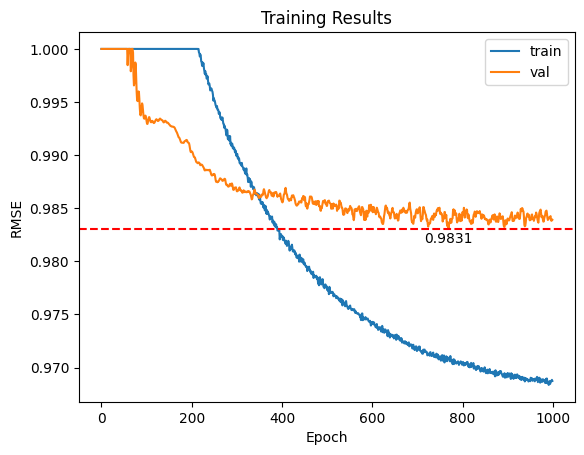

Testing INIT_EMBS_STD=0.055
Epoch 100 - Best Val: 0.9905 at 88 - mv-avg: - Train: 1.3452 - Val: 1.1853
Epoch 200 - Best Val: 0.9825 at 201 - mv-avg: - Train: 1.0222 - Val: 0.9861
Epoch 300 - Best Val: 0.9799 at 277 - mv-avg: - Train: 0.9964 - Val: 0.9814
Epoch 400 - Best Val: 0.9791 at 373 - mv-avg: - Train: 0.9838 - Val: 0.9798
Epoch 500 - Best Val: 0.9783 at 490 - mv-avg: - Train: 0.9750 - Val: 0.9790
Epoch 600 - Best Val: 0.9780 at 518 - mv-avg: - Train: 0.9693 - Val: 0.9789
Epoch 700 - Best Val: 0.9779 at 619 - mv-avg: - Train: 0.9663 - Val: 0.9788
Epoch 800 - Best Val: 0.9773 at 747 - mv-avg: - Train: 0.9646 - Val: 0.9784
Epoch 900 - Best Val: 0.9773 at 747 - mv-avg: - Train: 0.9631 - Val: 0.9782
Best val loss: 0.9767 at epoch 975


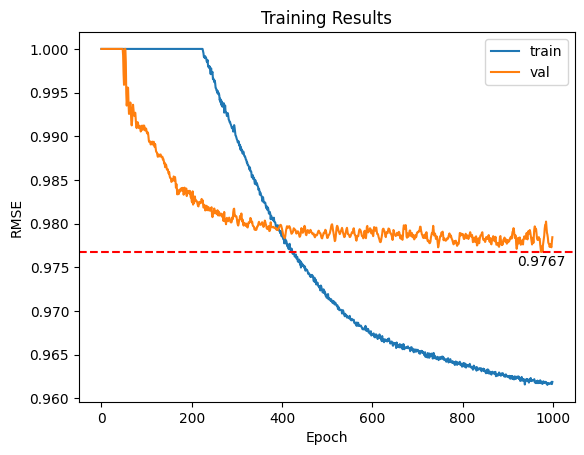

Testing INIT_EMBS_STD=0.06
Epoch 100 - Best Val: 0.9880 at 99 - mv-avg: - Train: 1.2861 - Val: 1.1853
Epoch 200 - Best Val: 0.9847 at 199 - mv-avg: - Train: 1.0136 - Val: 0.9866
Epoch 300 - Best Val: 0.9824 at 263 - mv-avg: - Train: 0.9923 - Val: 0.9833
Epoch 400 - Best Val: 0.9814 at 378 - mv-avg: - Train: 0.9813 - Val: 0.9823
Epoch 500 - Best Val: 0.9794 at 494 - mv-avg: - Train: 0.9740 - Val: 0.9807
Epoch 600 - Best Val: 0.9780 at 564 - mv-avg: - Train: 0.9687 - Val: 0.9790
Epoch 700 - Best Val: 0.9774 at 672 - mv-avg: - Train: 0.9649 - Val: 0.9783
Epoch 800 - Best Val: 0.9774 at 672 - mv-avg: - Train: 0.9625 - Val: 0.9782
Epoch 900 - Best Val: 0.9772 at 886 - mv-avg: - Train: 0.9615 - Val: 0.9782
Best val loss: 0.9768 at epoch 987


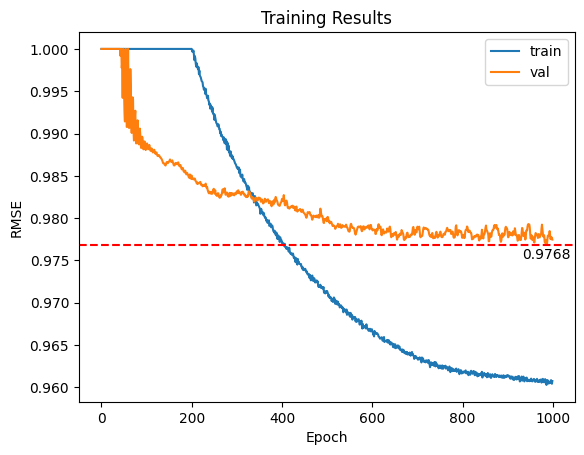

Testing INIT_EMBS_STD=0.065
Epoch 100 - Best Val: 0.9895 at 101 - mv-avg: - Train: 1.2500 - Val: 1.1539
Epoch 200 - Best Val: 0.9843 at 199 - mv-avg: - Train: 1.0062 - Val: 0.9871
Epoch 300 - Best Val: 0.9813 at 301 - mv-avg: - Train: 0.9855 - Val: 0.9828
Epoch 400 - Best Val: 0.9807 at 354 - mv-avg: - Train: 0.9731 - Val: 0.9816
Epoch 500 - Best Val: 0.9800 at 466 - mv-avg: - Train: 0.9665 - Val: 0.9811
Epoch 600 - Best Val: 0.9799 at 504 - mv-avg: - Train: 0.9620 - Val: 0.9812
Epoch 700 - Best Val: 0.9799 at 504 - mv-avg: - Train: 0.9597 - Val: 0.9824
Epoch 800 - Best Val: 0.9799 at 504 - mv-avg: - Train: 0.9585 - Val: 0.9829
Epoch 900 - Best Val: 0.9799 at 504 - mv-avg: - Train: 0.9578 - Val: 0.9833
Best val loss: 0.9799 at epoch 504


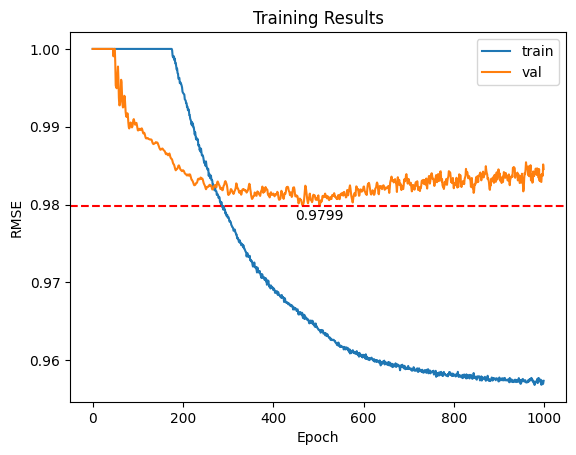

Testing INIT_EMBS_STD=0.07
Epoch 100 - Best Val: 0.9979 at 99 - mv-avg: - Train: 1.5620 - Val: 1.3866
Epoch 200 - Best Val: 0.9933 at 192 - mv-avg: - Train: 1.0446 - Val: 0.9955
Epoch 300 - Best Val: 0.9897 at 285 - mv-avg: - Train: 1.0059 - Val: 0.9914
Epoch 400 - Best Val: 0.9868 at 390 - mv-avg: - Train: 0.9877 - Val: 0.9884
Epoch 500 - Best Val: 0.9836 at 500 - mv-avg: - Train: 0.9767 - Val: 0.9851
Epoch 600 - Best Val: 0.9828 at 598 - mv-avg: - Train: 0.9709 - Val: 0.9835
Epoch 700 - Best Val: 0.9823 at 668 - mv-avg: - Train: 0.9681 - Val: 0.9828
Epoch 800 - Best Val: 0.9818 at 786 - mv-avg: - Train: 0.9663 - Val: 0.9825
Epoch 900 - Best Val: 0.9817 at 841 - mv-avg: - Train: 0.9649 - Val: 0.9821
Best val loss: 0.9813 at epoch 978


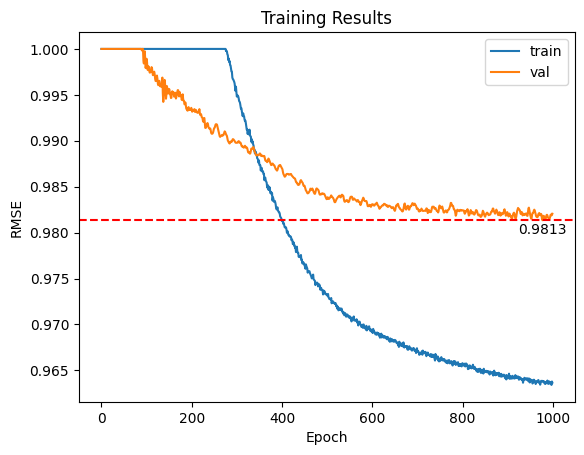

Testing INIT_EMBS_STD=0.075
Epoch 100 - Best Val: 0.9903 at 99 - mv-avg: - Train: 1.2341 - Val: 1.1403
Epoch 200 - Best Val: 0.9856 at 188 - mv-avg: - Train: 1.0029 - Val: 0.9882
Epoch 300 - Best Val: 0.9824 at 299 - mv-avg: - Train: 0.9838 - Val: 0.9841
Epoch 400 - Best Val: 0.9815 at 346 - mv-avg: - Train: 0.9717 - Val: 0.9829
Epoch 500 - Best Val: 0.9815 at 346 - mv-avg: - Train: 0.9633 - Val: 0.9835
Epoch 600 - Best Val: 0.9815 at 525 - mv-avg: - Train: 0.9578 - Val: 0.9830
Epoch 700 - Best Val: 0.9810 at 689 - mv-avg: - Train: 0.9547 - Val: 0.9824
Epoch 800 - Best Val: 0.9810 at 689 - mv-avg: - Train: 0.9529 - Val: 0.9825
Epoch 900 - Best Val: 0.9809 at 839 - mv-avg: - Train: 0.9518 - Val: 0.9825
Best val loss: 0.9809 at epoch 839


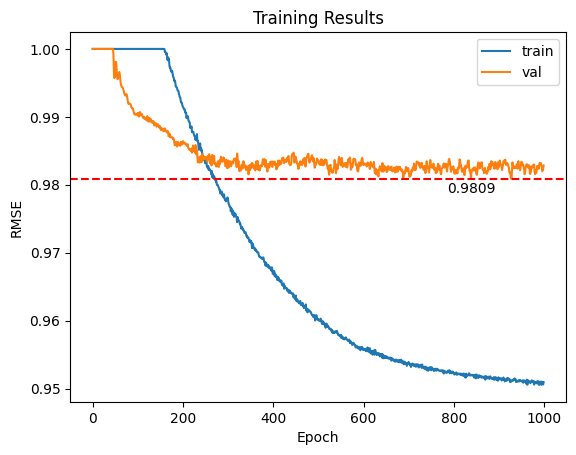

Testing INIT_EMBS_STD=0.08
Epoch 100 - Best Val: 0.9887 at 100 - mv-avg: - Train: 1.3902 - Val: 1.2718
Epoch 200 - Best Val: 0.9818 at 201 - mv-avg: - Train: 1.0203 - Val: 0.9853
Epoch 300 - Best Val: 0.9790 at 289 - mv-avg: - Train: 0.9964 - Val: 0.9805
Epoch 400 - Best Val: 0.9774 at 394 - mv-avg: - Train: 0.9848 - Val: 0.9787
Epoch 500 - Best Val: 0.9774 at 394 - mv-avg: - Train: 0.9781 - Val: 0.9781
Epoch 600 - Best Val: 0.9768 at 503 - mv-avg: - Train: 0.9731 - Val: 0.9778
Epoch 700 - Best Val: 0.9768 at 503 - mv-avg: - Train: 0.9690 - Val: 0.9781
Epoch 800 - Best Val: 0.9768 at 503 - mv-avg: - Train: 0.9661 - Val: 0.9787
Epoch 900 - Best Val: 0.9768 at 503 - mv-avg: - Train: 0.9643 - Val: 0.9792
Best val loss: 0.9768 at epoch 503


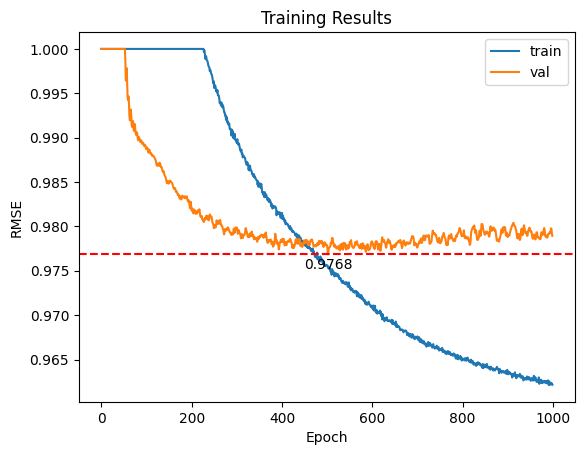

Testing INIT_EMBS_STD=0.085
Epoch 100 - Best Val: 0.9935 at 76 - mv-avg: - Train: 1.2664 - Val: 1.1578
Epoch 200 - Best Val: 0.9935 at 76 - mv-avg: - Train: 1.0087 - Val: 0.9946
Epoch 300 - Best Val: 0.9925 at 288 - mv-avg: - Train: 0.9963 - Val: 0.9935
Epoch 400 - Best Val: 0.9871 at 400 - mv-avg: - Train: 0.9876 - Val: 0.9908
Epoch 500 - Best Val: 0.9845 at 486 - mv-avg: - Train: 0.9796 - Val: 0.9862
Epoch 600 - Best Val: 0.9831 at 601 - mv-avg: - Train: 0.9738 - Val: 0.9840
Epoch 700 - Best Val: 0.9819 at 696 - mv-avg: - Train: 0.9695 - Val: 0.9832
Epoch 800 - Best Val: 0.9819 at 696 - mv-avg: - Train: 0.9656 - Val: 0.9832
Epoch 900 - Best Val: 0.9814 at 859 - mv-avg: - Train: 0.9630 - Val: 0.9827
Best val loss: 0.9798 at epoch 974


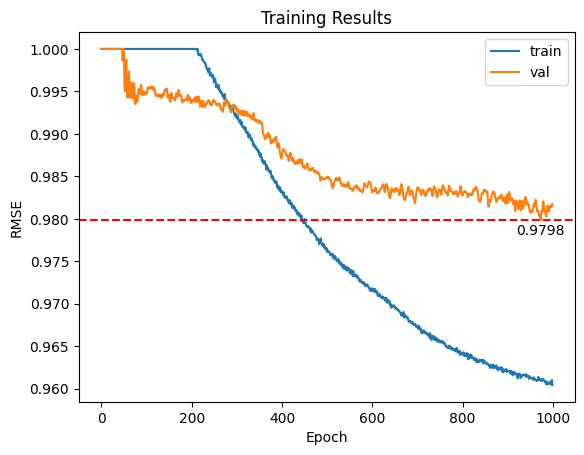

Testing INIT_EMBS_STD=0.09
Epoch 100 - Best Val: 0.9907 at 101 - mv-avg: - Train: 1.2377 - Val: 1.1281
Epoch 200 - Best Val: 0.9837 at 201 - mv-avg: - Train: 1.0171 - Val: 0.9870
Epoch 300 - Best Val: 0.9811 at 290 - mv-avg: - Train: 0.9895 - Val: 0.9826
Epoch 400 - Best Val: 0.9797 at 392 - mv-avg: - Train: 0.9752 - Val: 0.9810
Epoch 500 - Best Val: 0.9796 at 476 - mv-avg: - Train: 0.9678 - Val: 0.9804
Epoch 600 - Best Val: 0.9785 at 591 - mv-avg: - Train: 0.9639 - Val: 0.9800
Epoch 700 - Best Val: 0.9785 at 591 - mv-avg: - Train: 0.9612 - Val: 0.9800
Epoch 800 - Best Val: 0.9784 at 753 - mv-avg: - Train: 0.9590 - Val: 0.9797
Epoch 900 - Best Val: 0.9784 at 753 - mv-avg: - Train: 0.9575 - Val: 0.9800
Best val loss: 0.9784 at epoch 753


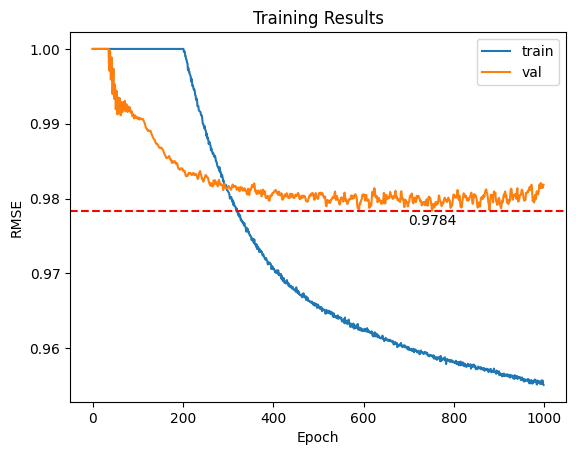

Testing INIT_EMBS_STD=0.1
Epoch 100 - Best Val: 0.9876 at 93 - mv-avg: - Train: 1.1967 - Val: 1.1008
Epoch 200 - Best Val: 0.9847 at 182 - mv-avg: - Train: 1.0071 - Val: 0.9864
Epoch 300 - Best Val: 0.9811 at 285 - mv-avg: - Train: 0.9884 - Val: 0.9831
Epoch 400 - Best Val: 0.9811 at 311 - mv-avg: - Train: 0.9766 - Val: 0.9822
Epoch 500 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9703 - Val: 0.9817
Epoch 600 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9656 - Val: 0.9816
Epoch 700 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9627 - Val: 0.9829
Epoch 800 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9613 - Val: 0.9834
Epoch 900 - Best Val: 0.9801 at 447 - mv-avg: - Train: 0.9605 - Val: 0.9840
Best val loss: 0.9801 at epoch 447


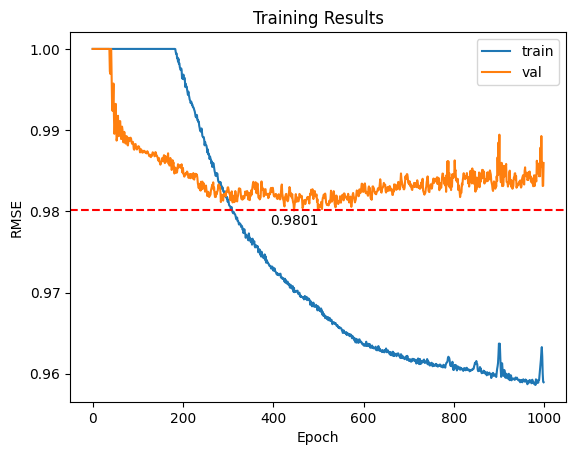

In [13]:

# Test varying INIT_EMBS_STD
for value in init_embs_stds:
    model = LightGCNPlus(A_tilde, ACT_FN, K, L, value, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing INIT_EMBS_STD={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((value, LR, WEIGHT_DECAY, DROPOUT, ACT_FN))


In [ ]:
# Test varying LR
for value in lrs:
    model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=value, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing LR={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, value, WEIGHT_DECAY, DROPOUT, ACT_FN))


In [ ]:

# Test varying WEIGHT_DECAY
for value in weight_decays:
    model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=value)
    loss_fn = nn.MSELoss()
    print(f"Testing WEIGHT_DECAY={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, LR, value, DROPOUT, ACT_FN))


In [ ]:

# Test varying DROPOUT
for value in dropouts:
    model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, value, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing DROPOUT={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, LR, WEIGHT_DECAY, value, ACT_FN))


In [ ]:

# Test varying ACT_FN
for value in activation_functions:
    model = LightGCNPlus(A_tilde, value, K, L, INIT_EMBS_STD, DROPOUT, PROJECTIONS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    loss_fn = nn.MSELoss()
    print(f"Testing ACT_FN={value}")
    train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=False, verbosity=100)
    report_training_results(train_rmse, val_rmse)

    results["min_val_losses"].append(min(val_rmse))
    results["params"].append((INIT_EMBS_STD, LR, WEIGHT_DECAY, DROPOUT, value))

In [40]:
# TODO: cannot continue training from checkpoint, because best_val = inf when resuming

# model = load_best_val_model(model_class, ID)
model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, DROPOUT, C).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
loss_fn = nn.MSELoss()
train_rmse, val_rmse = train_model(model, optimizer, loss_fn, train_users, train_items, train_ratings, val_users, val_items, val_ratings, EPOCHS, STOP_THRESHOLD, save_best_model=True, verbosity=1)
report_training_results(train_rmse, val_rmse)

best_loss inf
Epoch 1 - Best Val: 3.1911 at 1 - mv-avg: - Train: 3.1708 - Val: 8.8958
Epoch 2 - Best Val: 1.1377 at 3 - mv-avg: - Train: 9.2949 - Val: 1.1377
Epoch 3 - Best Val: 1.1377 at 3 - mv-avg: - Train: 1.2635 - Val: 2.2038
Epoch 4 - Best Val: 1.1377 at 3 - mv-avg: - Train: 2.2113 - Val: 2.9457
Epoch 5 - Best Val: 1.1377 at 3 - mv-avg: - Train: 3.0996 - Val: 3.2427
Epoch 6 - Best Val: 1.1377 at 3 - mv-avg: - Train: 3.2983 - Val: 2.2593
Epoch 7 - Best Val: 1.1377 at 3 - mv-avg: - Train: 2.2989 - Val: 1.2137
Epoch 8 - Best Val: 1.1377 at 3 - mv-avg: - Train: 1.3358 - Val: 1.4813
Epoch 9 - Best Val: 1.1377 at 3 - mv-avg: - Train: 1.6695 - Val: 1.2156
Epoch 10 - Best Val: 1.1377 at 3 - mv-avg: - Train: 1.3636 - Val: 1.5829
Epoch 11 - Best Val: 1.1377 at 3 - mv-avg: - Train: 1.6557 - Val: 1.1926
Epoch 12 - Best Val: 1.1377 at 3 - mv-avg: - Train: 1.3332 - Val: 1.4017
Epoch 13 - Best Val: 1.1377 at 3 - mv-avg: - Train: 1.5849 - Val: 1.1456
Epoch 14 - Best Val: 1.1377 at 3 - mv-avg: - T

In [ ]:
# Report top k best hyperparameter combos
TOP_K = 10
best_ids = np.argsort(results["min_val_losses"])[:TOP_K]

for i in best_ids:
    print(f"Best hyperparameters: {results['params'][i]}")
    print(f"Best val loss: {results['min_val_losses'][i]}")

min: 0.04022169
max: 5.699665
mean: 3.8560307


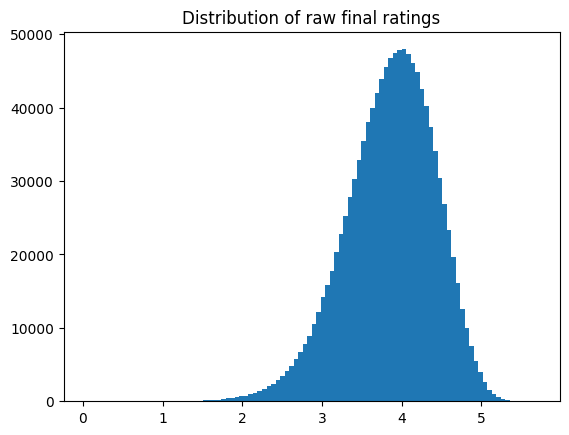

min: 1.0
max: 5.0
mean: 3.8553733392107703
count_over_5: 0
count_under_1: 0

min: 1.0
max: 5.0
mean: 3.8553733392107703


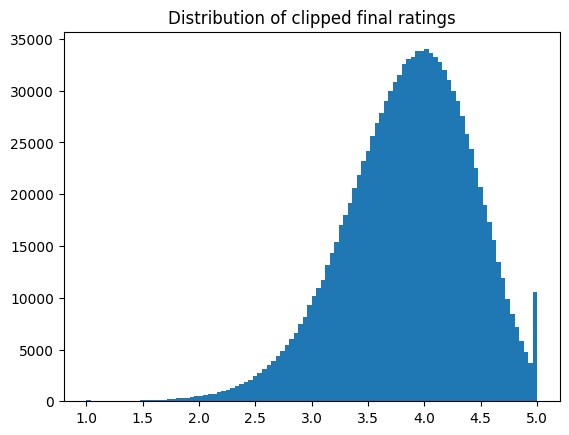

In [7]:
from postprocess import load_submission_users_items, report_submission_results, create_submission_matrix, report_clip_data, to_submission_format, load_means_stds, load_best_val_model

model_class = LightGCNPlus
ID = str(28) + "_" + str(5) + "_" + str((6,))

sub_users, sub_items = load_submission_users_items()
model = load_best_val_model(model_class, ID)

# Get predictions from model for submission users and items
raw_pred_ratings = model.get_ratings(sub_users, sub_items).detach().cpu().numpy()
raw_submission_matrix = create_submission_matrix(raw_pred_ratings, sub_users, sub_items)
pred_ratings = raw_submission_matrix[sub_users, sub_items]
pred_ratings = np.clip(pred_ratings, 1, 5)

# Report results
report_submission_results(raw_pred_ratings, "raw")
report_clip_data(pred_ratings)
report_submission_results(pred_ratings, "clipped")

# Generate submission file
submission = to_submission_format(sub_users, sub_items, pred_ratings)
submission.to_csv('../data/submission_data/submission.csv', index=False)